In [1]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\narma\appdata\local\programs\python\python312\lib\site-packages (4.11.0.86)




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


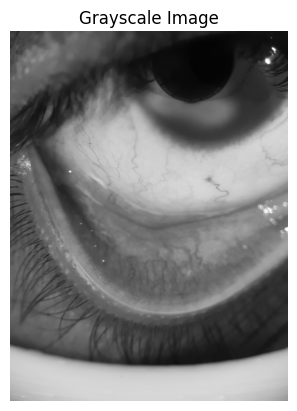

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\narma\Downloads\20200118_164733.jpg\20200118_164733.jpg") 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

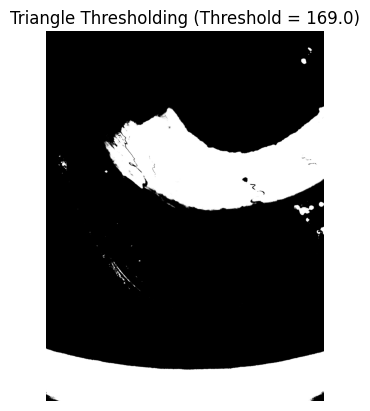

In [5]:
# triangle thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

plt.imshow(thresh, cmap='gray')
plt.title(f'Triangle Thresholding (Threshold = {ret})')
plt.axis('off')
plt.show()

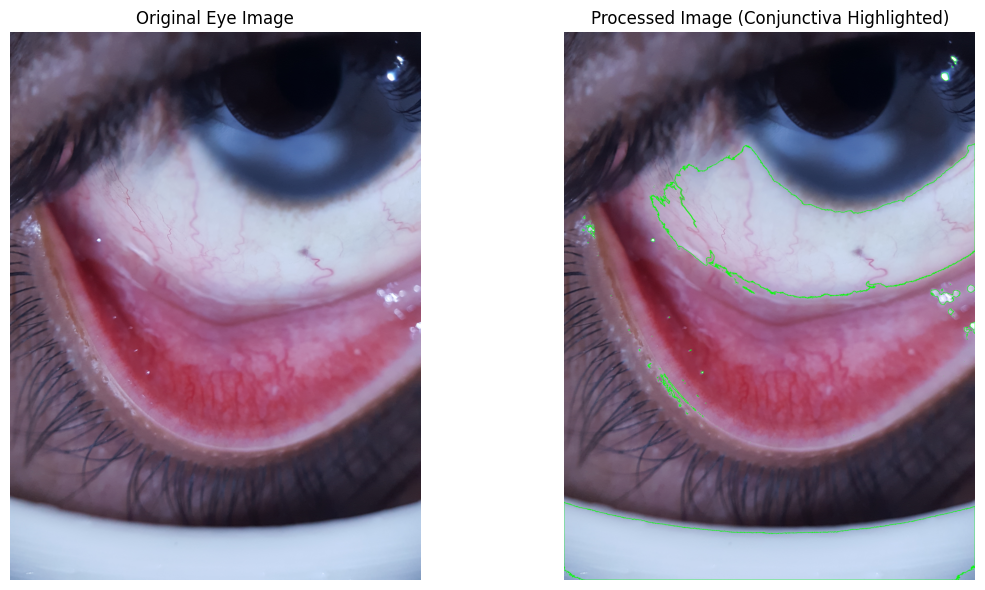

In [7]:

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

highlighted = image.copy()
cv2.drawContours(highlighted, contours, -1, (0, 255, 0), 2)  # Green outline

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Eye Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))
axs[1].set_title('Processed Image (Conjunctiva Highlighted)')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 5.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.9 MB 5.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.9 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/12.9 MB 1.8 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.9 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.9 MB 1.4 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/12.9 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/12.9 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.9 MB 1.1 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.9 MB 1.1 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.9 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.9 MB 919.4 kB/s eta 0:00:12
   -


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


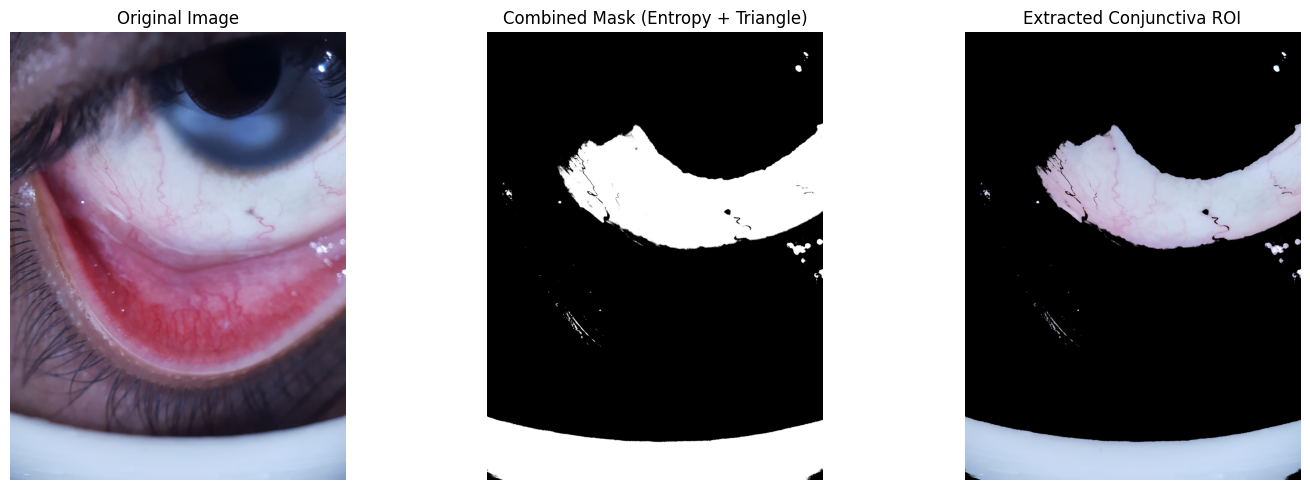

In [12]:
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_li
import numpy as np

image = cv2.imread(r"C:\Users\narma\Downloads\20200118_164733.jpg\20200118_164733.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Entropy-based thresholding 
entropy_thresh = threshold_li(gray)
mask_entropy = gray > entropy_thresh
mask_entropy = (mask_entropy * 255).astype('uint8')

# Step 2: Triangle thresholding
ret_triangle, mask_triangle = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

# Step 3: Combine
combined_mask = cv2.bitwise_and(mask_entropy, mask_triangle)

roi = cv2.bitwise_and(image, image, mask=combined_mask)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(combined_mask, cmap='gray')
axs[1].set_title('Combined Mask (Entropy + Triangle)')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axs[2].set_title('Extracted Conjunctiva ROI')
axs[2].axis('off')

plt.tight_layout()
plt.show()

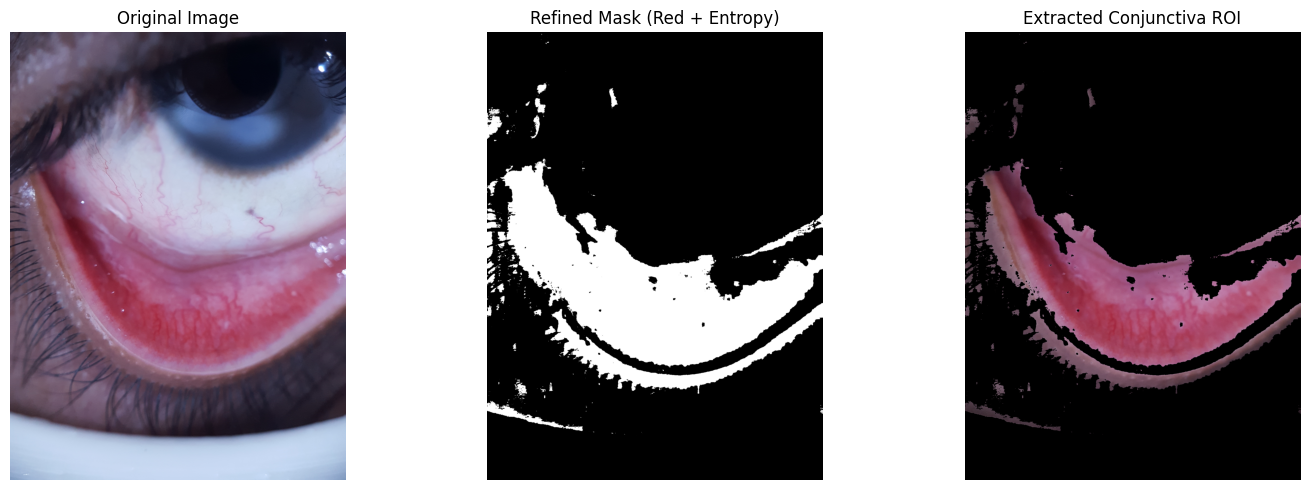

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_li

# Load image
image = cv2.imread((r"C:\Users\narma\Downloads\20200118_164733.jpg\20200118_164733.jpg") )

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 1: Filter red tones (conjunctiva)
lower_red1 = (0, 50, 50)
upper_red1 = (10, 255, 255)
lower_red2 = (160, 50, 50)
upper_red2 = (180, 255, 255)

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Step 2: Apply red mask to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
masked_gray = cv2.bitwise_and(gray, gray, mask=red_mask)

# Step 3: Apply entropy thresholding only on red region
entropy_thresh = threshold_li(masked_gray)
roi_mask = masked_gray > entropy_thresh
roi_mask = (roi_mask * 255).astype('uint8')

# Step 4: Apply mask to original image
roi = cv2.bitwise_and(image, image, mask=roi_mask)

# Step 5: Display results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(roi_mask, cmap='gray')
axs[1].set_title('Refined Mask (Red + Entropy)')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axs[2].set_title('Extracted Conjunctiva ROI')
axs[2].axis('off')

plt.tight_layout()
plt.show()